In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind

import warnings
warnings.simplefilter("ignore")

In [5]:
df = pd.read_excel('Lesson8_AB_Test_Results.xlsx')
df.head(10)

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0
5,2380,variant,0.0
6,2849,control,0.0
7,9168,control,0.0
8,6205,variant,0.0
9,7548,control,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       10000 non-null  int64  
 1   VARIANT_NAME  10000 non-null  object 
 2   REVENUE       10000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 234.5+ KB


In [7]:
df.describe()

,USER_ID,REVENUE
count,10000.000000,10000.000000
mean,4981.080200,0.099447
std,2890.590115,2.318529
min,2.000000,0.000000
25%,2468.750000,0.000000
50%,4962.000000,0.000000
75%,7511.500000,0.000000
max,10000.000000,196.010000


In [8]:
df.isna().sum()

USER_ID         0
VARIANT_NAME    0
REVENUE         0
dtype: int64

In [9]:
df.VARIANT_NAME.value_counts()

variant    5016
control    4984
Name: VARIANT_NAME, dtype: int64

Уберем из данных пользователей, попавших в обе группы.

In [13]:
v = df.groupby('USER_ID', as_index=False).agg({'VARIANT_NAME': pd.Series.nunique})

In [16]:
v.head(20)

,USER_ID,VARIANT_NAME
0,2,1
1,3,2
2,4,1
3,5,1
4,6,1
5,9,1
6,10,2
7,11,1
8,12,1
9,13,1


In [18]:
more_than_one_types = v.query('VARIANT_NAME > 1')

In [19]:
df_new = df[~df.USER_ID.isin(more_than_one_types.USER_ID)].sort_values('USER_ID')

In [20]:
df_new

,USER_ID,VARIANT_NAME,REVENUE
3479,2,control,0.0
7076,2,control,0.0
2406,2,control,0.0
9077,4,variant,0.0
9155,5,variant,0.0
...,...,...,...
3260,9992,control,0.0
9290,9993,control,0.0
2749,9995,variant,0.0
5673,9995,variant,0.0


In [29]:
df_new.describe()

,USER_ID,REVENUE
count,6070.000000,6070.000000
mean,4983.664086,0.107064
std,2897.990118,2.673501
min,2.000000,0.000000
25%,2472.250000,0.000000
50%,4950.000000,0.000000
75%,7501.000000,0.000000
max,9998.000000,196.010000


In [21]:
df_new.VARIANT_NAME.value_counts()

variant    3044
control    3026
Name: VARIANT_NAME, dtype: int64

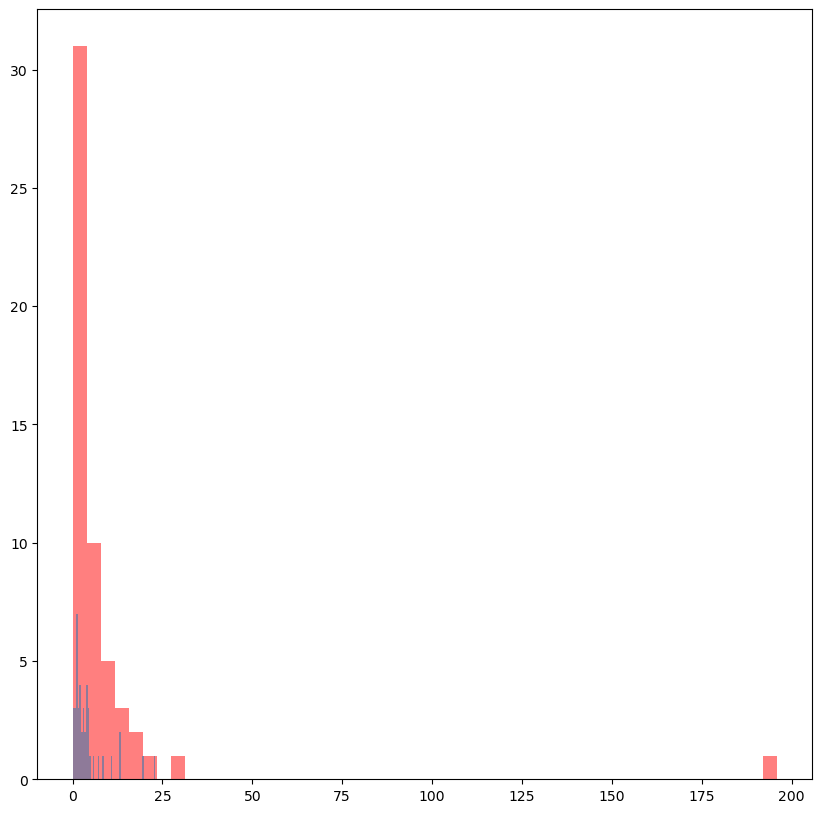

In [40]:
plt.figure(figsize=(10, 10))
control_visit_all = df_new['REVENUE'][(df_new['VARIANT_NAME']=='control') & (df_new['REVENUE'] > 0)]
test_visit_all = df_new['REVENUE'][(df_new['VARIANT_NAME']=='variant') & (df['REVENUE'] > 0)]

plt.hist(control_visit_all, color='r', bins=50, alpha = 0.5)
plt.hist(test_visit_all, bins=50, alpha = 0.5)

plt.show()

In [36]:
mannwhitneyu(control_visit_all, test_visit_all)

MannwhitneyuResult(statistic=1292.0, pvalue=0.3431833825117172)

In [45]:
ttest_ind(control_visit_all, test_visit_all, equal_var = False)

Ttest_indResult(statistic=1.2278007242527045, pvalue=0.22452159236149474)

pvalue > 0.05, а значит нет статистически значимых отличий от нулевой гипотезы, т.е. оставляем как есть.